# OnlineStats Examples

### Online Linear Regression

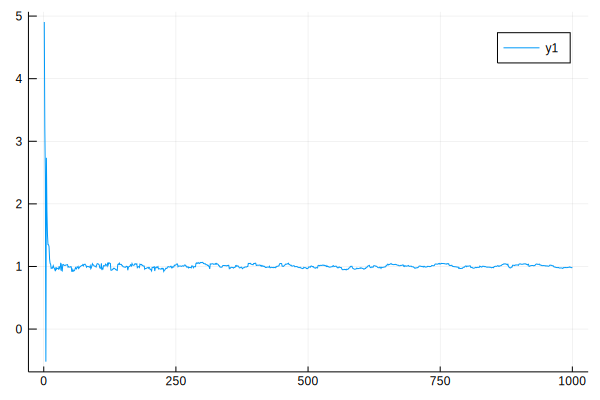

In [13]:
using OnlineStats, LossFunctions, PenaltyFunctions
using Random, Plots

Random.seed!(82)

# Data Parameters
n, p = 1000, 1
β = 1:p
ϵ = 0.1

# Data Generation
X = randn(n, p)
Y = X * β + ϵ * randn(n)

# Define model
LossFunc = L2DistLoss()
PenaltyFunc = L2Penalty()
updater = SGD()
model = StatLearn(p, LossFunc, PenaltyFunc, updater, rate=LearningRate(0.5))

# Outputs
inferred_β = zeros(n)
loss = zeros(n)

# Online fit
for i in 1:n
    Xᵢ = @view X[i, :]
    Yᵢ = Y[i]
    fit!(model, (Xᵢ, Yᵢ))
    inferred_β[i] = coef(model)[1]
    loss[i] = OnlineStats.objective(model, X, Y)
end

plot(inferred_β)